In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
df= pd.read_csv('spam_ham_dataset[1].csv')

In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3694,1135,ham,Subject: meoh upset\r\nthe meoh plant began ha...,0
3159,2079,ham,"Subject: accrued thru nov . 19\r\ndaren ,\r\np...",0
4170,2125,ham,Subject: calpine monthly nomination\r\n- - - -...,0
3136,3132,ham,Subject: calpine daily and monthly nomination\...,0
3354,2418,ham,Subject: vacation carryover\r\nwant to verify ...,0


In [5]:
df.shape

(5171, 4)

In [6]:
# 1.Data cleaning
# 2. EDA
# 3.Text Preproccessing
# 4.Model Rebuilding
# 5.Evaluation
#8.Deploy

In [7]:
##  1. DATA CLEANING

In [8]:
df.info

<bound method DataFrame.info of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
df.sample(5)

,Unnamed: 0,label,text,label_num
938,1075,ham,"Subject: conoco , inc . - missing deal for may...",0
5031,64,ham,"Subject: enron actuals for december 28 , 1999\...",0
2224,4616,spam,Subject: oxxxyyconnntin no scriptt\r\nno doxxc...,1
2622,913,ham,Subject: confirming requisitions\r\nconfirming...,0
839,3395,ham,Subject: txu fuel company\r\nwe cannot enter i...,0


In [11]:
#renaming the columns:
df.rename(columns={'label':'target','label_num':'target_num'},inplace=True)
df.sample(5)

,Unnamed: 0,target,text,target_num
4273,153,ham,Subject: re : 12 / 99 k ' s needed and 1 / 200...,0
4655,4077,spam,Subject: superb so . ftware\r\nyoull discover ...,1
653,4933,spam,"Subject: approval no . 09110129\r\nhello ,\r\n...",1
4241,1197,ham,"Subject: settelement request for an equistar ""...",0
1498,2376,ham,Subject: re : meter 1517\r\ngary - we did not ...,0


In [12]:
df.rename(columns={'unnamed:0':'count'},inplace=True)

In [13]:
df.sample(5)

,Unnamed: 0,target,text,target_num
1107,1136,ham,"Subject: hpl noms for july 6 , 2000\r\n( see a...",0
2712,292,ham,"Subject: sale to shoreline\r\ncharlotte , plea...",0
3988,2065,ham,"Subject: enron / hpl actuals for november 16 ,...",0
1513,1816,ham,Subject: re : october spot purchases\r\nvance ...,0
2920,2650,ham,"Subject: hpl nom for march 2 , 2001\r\n( see a...",0


In [14]:

encoder= preprocessing.LabelEncoder()

In [15]:
encoder.fit_transform(df['target'])

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
df['target']=encoder.fit_transform(df['target'])

In [17]:
df.head()

,Unnamed: 0,target,text,target_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
#missing values
df.isnull().sum()

Unnamed: 0    0
target        0
text          0
target_num    0
dtype: int64

In [19]:
#check for duplicate values
df.duplicated().sum()

0

In [20]:
df.shape

(5171, 4)

In [21]:
## EXPLORATORY DATA ANALYSIS

In [22]:
df['target'].value_counts()

target
0    3672
1    1499
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x13a51afea10>,
 [Text(-0.6745093333607546, 0.8689287423081543, 'ham'),
  Text(0.6745094147157317, -0.868928679156029, 'spam')],
 [Text(-0.3679141818331388, 0.4739611321680841, '71.01'),
  Text(0.3679142262085809, -0.4739610977214703, '28.99')])

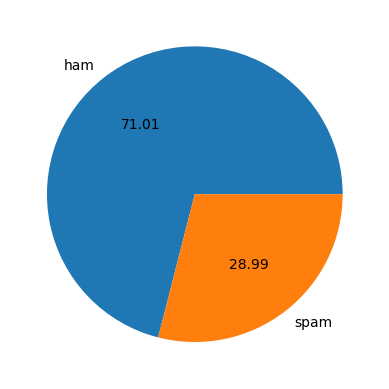

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [25]:
#Data is inbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,Unnamed: 0,target,text,target_num,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [31]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,Unnamed: 0,target,text,target_num,num_characters,num_words
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [34]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,Unnamed: 0,target,text,target_num,num_characters,num_words,num_sentences
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [37]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [38]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

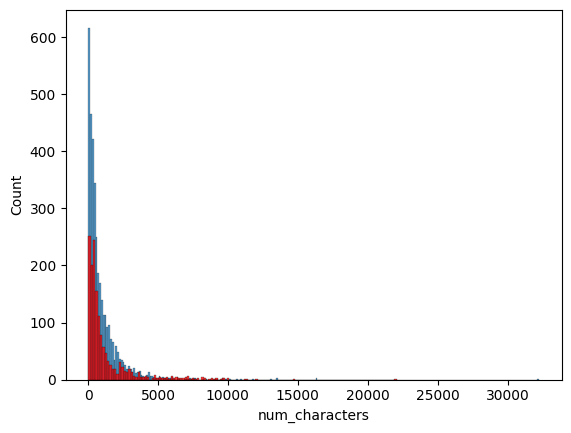

In [40]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

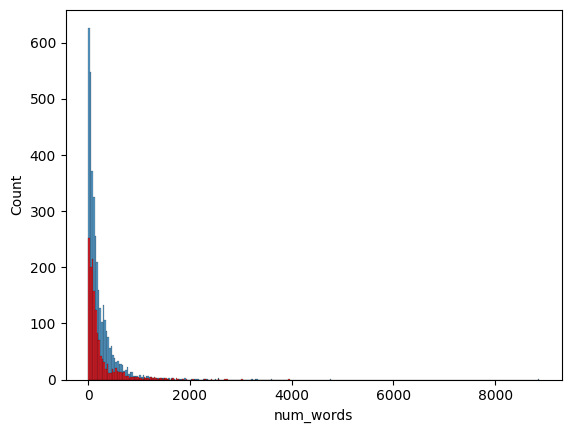

In [41]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

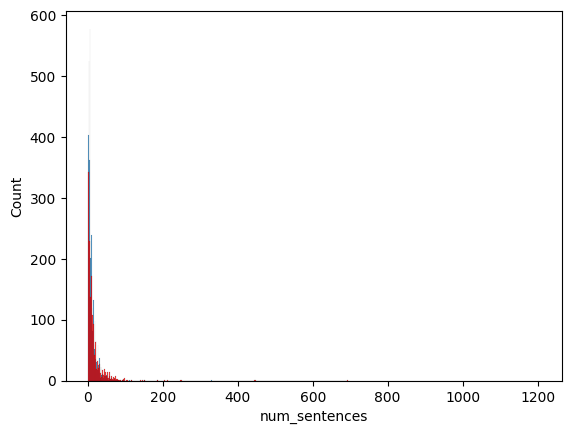

In [42]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

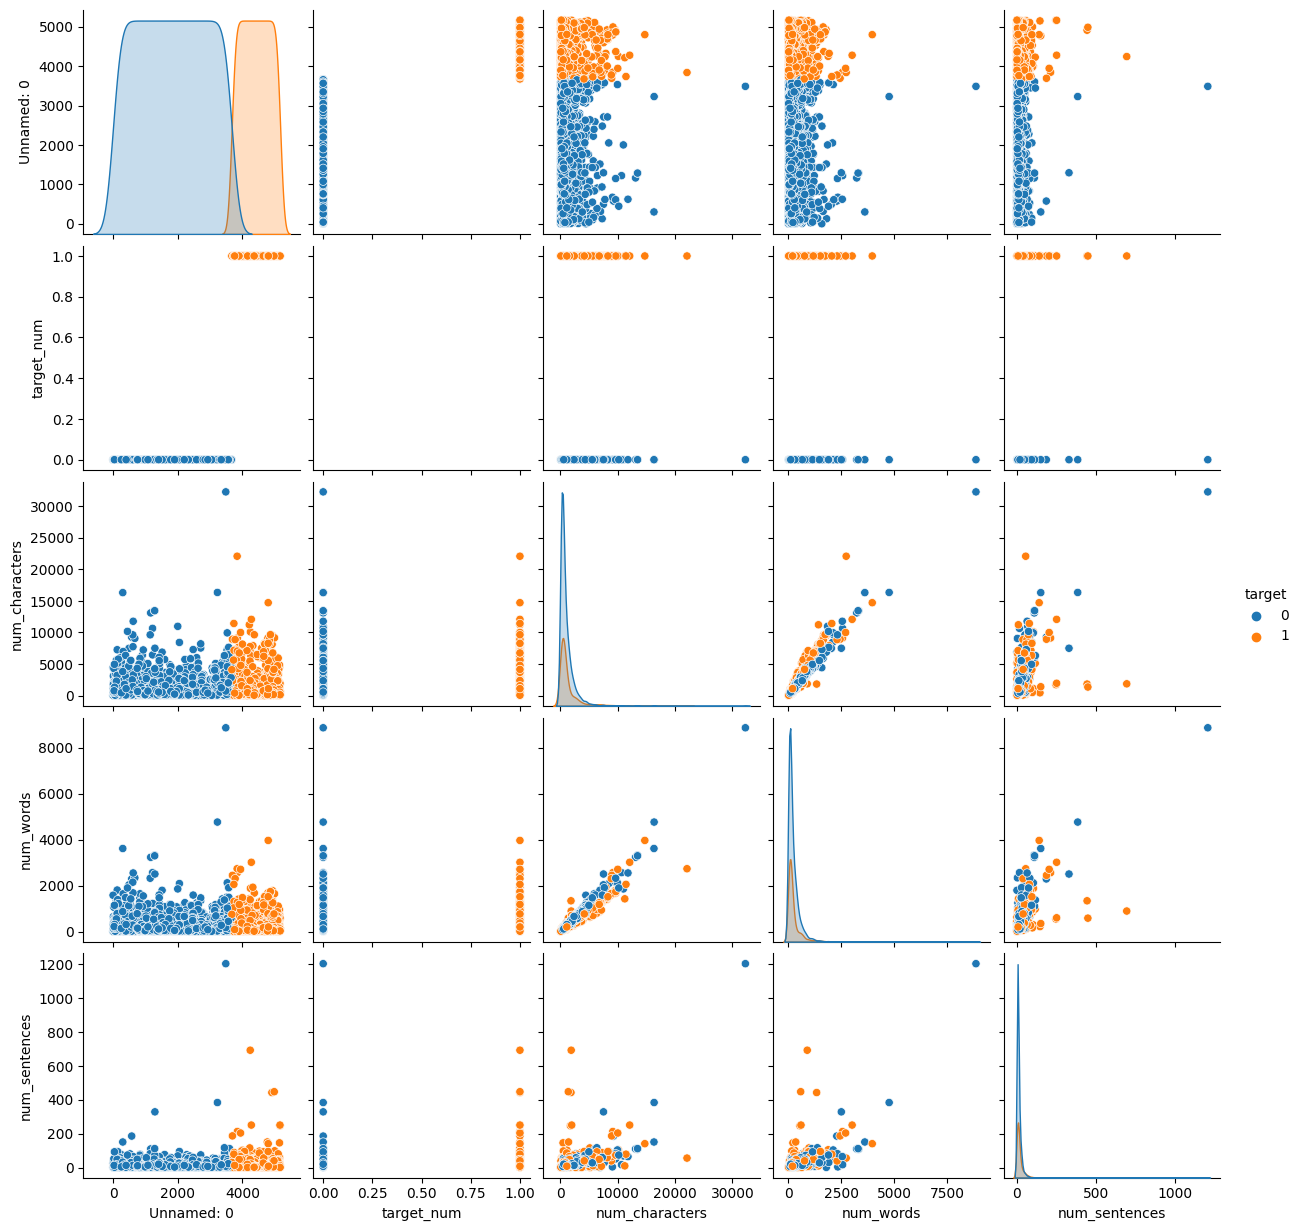

In [44]:
sns.pairplot(df,hue='target')

In [45]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: "Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [46]:
# 3.Data preproccessing
# Lower case 
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming


In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stopwords.words('English')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANIKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer

In [50]:
ps=PorterStemmer()

In [51]:
ps.stem('loving')

'love'

In [52]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
        
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [53]:
transform_text("'Subject: help !\r\nbrian ,\r\nwho do i talk to about getting daren farmer a labor distribution report . he\r\nneeds to see what employees are hitting his rc . i know that we have\r\ndiscussed this prior and soem managers are receiving a monthly report but he\r\nis not . who can help us ? ? ?\r\nthank you !\r\nyvette\r\nx 3 . 5953'")

'help brian talk get daren farmer labor distribut report need see employe hit rc know discuss prior soem manag receiv monthli report help us thank yvett x 3 5953'

In [54]:
df['text'][100]

'Subject: help !\r\nbrian ,\r\nwho do i talk to about getting daren farmer a labor distribution report . he\r\nneeds to see what employees are hitting his rc . i know that we have\r\ndiscussed this prior and soem managers are receiving a monthly report but he\r\nis not . who can help us ? ? ?\r\nthank you !\r\nyvette\r\nx 3 . 5953'

In [55]:
df['text'].apply(transform_text)

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: text, Length: 5171, dtype: object

In [58]:
df['transformed_text']=df['text'].apply(transform_text)

In [59]:
df.head()

,Unnamed: 0,target,text,target_num,num_characters,num_words,num_sentences,transformed_text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [60]:
from wordcloud import WordCloud
wc=WordCloud(width=100,height=100,min_font_size=10,background_color='white')

In [61]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

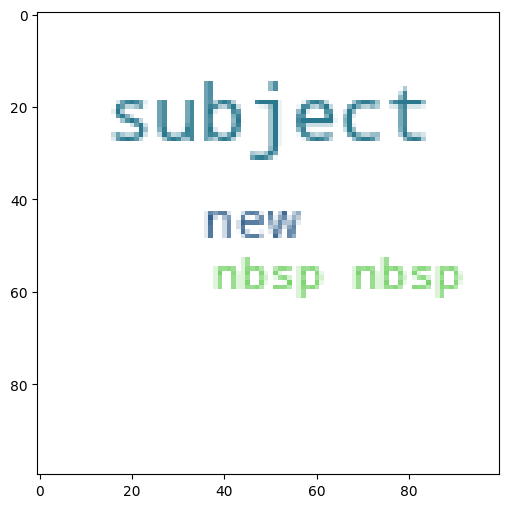

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

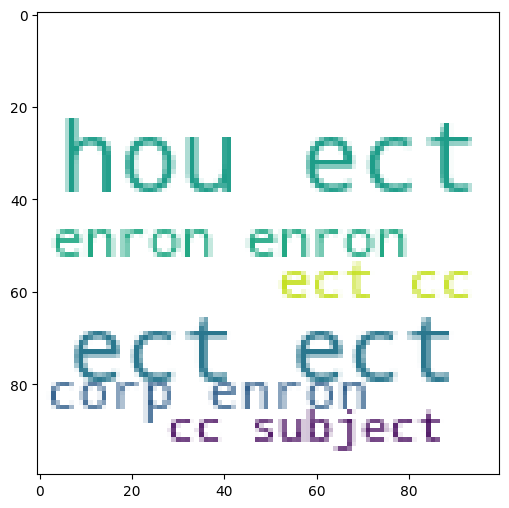

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
spam_corpus=[]
for message in df[df['target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [66]:
len(spam_corpus)

197452

In [67]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

388650

In [70]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [71]:
#4.Naive Baye's algorithm Model

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [73]:
X=cv.fit_transform(df['transformed_text']).toarray()
Y=tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
 X.shape

(5171, 42592)

In [75]:
Y.shape

(5171, 42592)

In [76]:
y=df['target'].values

In [77]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [80]:
Y_train,Y_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [83]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [85]:
gnb.fit(Y_train,y_train)
y_pre1=gnb.predict(Y_test)
print(accuracy_score(y_test,y_pre1))
print(confusion_matrix(y_test,y_pre1))
print(precision_score(y_test,y_pre1))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [86]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9719806763285024
[[729  17]
 [ 12 277]]
0.9421768707482994


In [87]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [88]:
bnb.fit(Y_train,y_train)
y_predi3=bnb.predict(Y_test)
print(accuracy_score(y_test,y_predi3))
print(confusion_matrix(y_test,y_predi3))
print(precision_score(y_test,y_predi3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [89]:
mnb.fit(Y_train,y_train)
y_predict2=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9719806763285024
[[729  17]
 [ 12 277]]
0.9421768707482994


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [92]:
clfs ={
     'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [93]:
def train_classifier(clf,Y_train,y_train,Y_test,y_test):
    clf.fit(Y_train,y_train)
    y_pred = clf.predict(Y_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
train_classifier(svc,Y_train,y_train,Y_test,y_test)

(0.8367149758454107, 0.7013422818791947)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8367149758454107
Precision -  0.7013422818791947
For  KN
Accuracy -  0.8338164251207729
Precision -  0.6326530612244898
For  NB
Accuracy -  0.9719806763285024
Precision -  0.9421768707482994
For  DT
Accuracy -  0.8521739130434782
Precision -  0.6666666666666666
For  LR
Accuracy -  0.9719806763285024
Precision -  0.9276315789473685
For  RF
Accuracy -  0.9768115942028985
Precision -  0.9431438127090301
For  AdaBoost
Accuracy -  0.9623188405797102
Precision -  0.9084967320261438


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))